# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# LOADING DATA

In [2]:
adultDF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv") 

# DATA EXPLORE

In [3]:
adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


In [4]:
adultDF.shape

(14797, 9)

In [5]:
adultDF.dtypes.sort_values()

age                int64
education          int64
capital-gain       int64
capital-loss       int64
workclass         object
marital-status    object
occupation        object
sex               object
income            object
dtype: object

In [6]:
adultDF.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'sex',
       'capital-gain', 'capital-loss', 'income'],
      dtype='object')

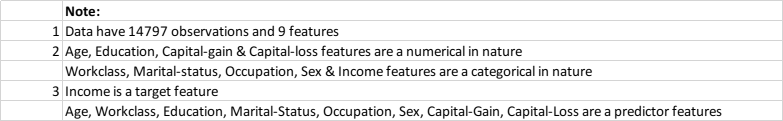

# FEATURE ENGINEERING

In [7]:
adultDF['capital_gains_losses'] = adultDF['capital-gain']+abs(adultDF['capital-loss'])

In [8]:
adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,capital_gains_losses
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,14084



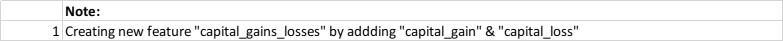

# CREATING NEW DATAFRAME

In [9]:
new_adultDF = adultDF[['marital-status', 'capital_gains_losses', 'income']]

In [10]:
new_adultDF.head(10)

,marital-status,capital_gains_losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


# COUNT PLOT: INCOME

In [11]:
new_adultDF['income'].value_counts(normalize=True)

<=50K    0.759816
>50K     0.240184
Name: income, dtype: float64

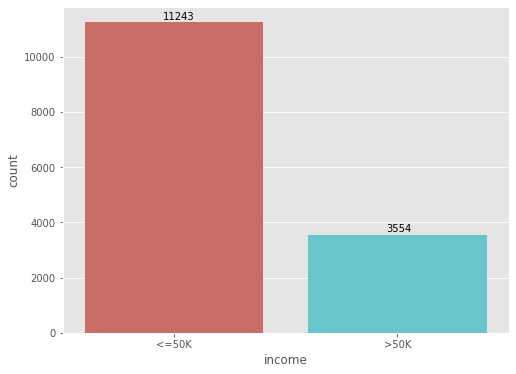

In [12]:
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
ax = sns.countplot(x='income', data=new_adultDF, palette='hls');
        
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+100))

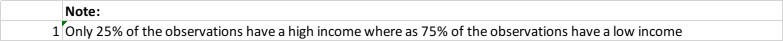

# LABLE ENCODING

In [13]:
le = LabelEncoder()

In [14]:
new_adultDF['marital-status'] = le.fit_transform(new_adultDF['marital-status'])
new_adultDF['income'] = le.fit_transform(new_adultDF['income'])

/home/bhavik/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [15]:
new_adultDF.head(10)

,marital-status,capital_gains_losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


# TRAIN TEST SPLIT (80:20)

In [16]:
X = new_adultDF[['marital-status', 'capital_gains_losses']]
y = new_adultDF['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11837, 2), (2960, 2), (11837,), (2960,))

# HISTOGRAM ON INCOME FROM TRAIN AND TEST

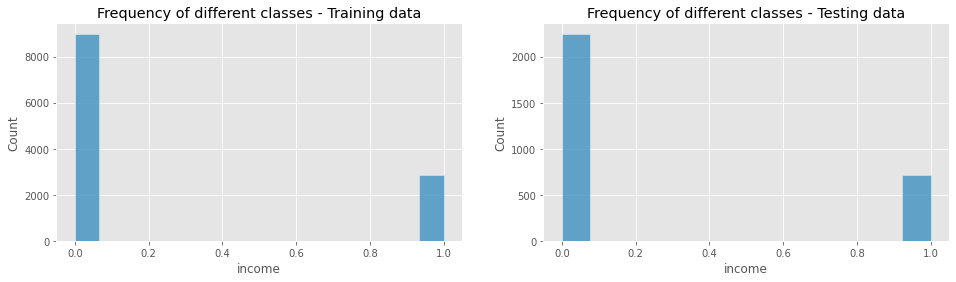

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.histplot(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
sns.histplot(y_test);
plt.title('Frequency of different classes - Testing data');

In [18]:
print('Income feature class distribution on Train Set:')
display(y_train.value_counts(normalize=True).to_frame())
print('Income feature class distribution on Test Set:')
display(y_test.value_counts(normalize=True).to_frame())

Income feature class distribution on Train Set:


,income
0,0.759821
1,0.240179


Income feature class distribution on Test Set:


,income
0,0.759797
1,0.240203


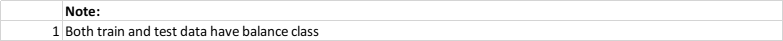

# TRAIN A MODEL USING CART CLASSIFIER

In [19]:
cart_classifier = DecisionTreeClassifier(criterion='gini',
                                         max_leaf_nodes=5,
                                         random_state=120)
cart_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=120)

# VISUALIZING CART TREE

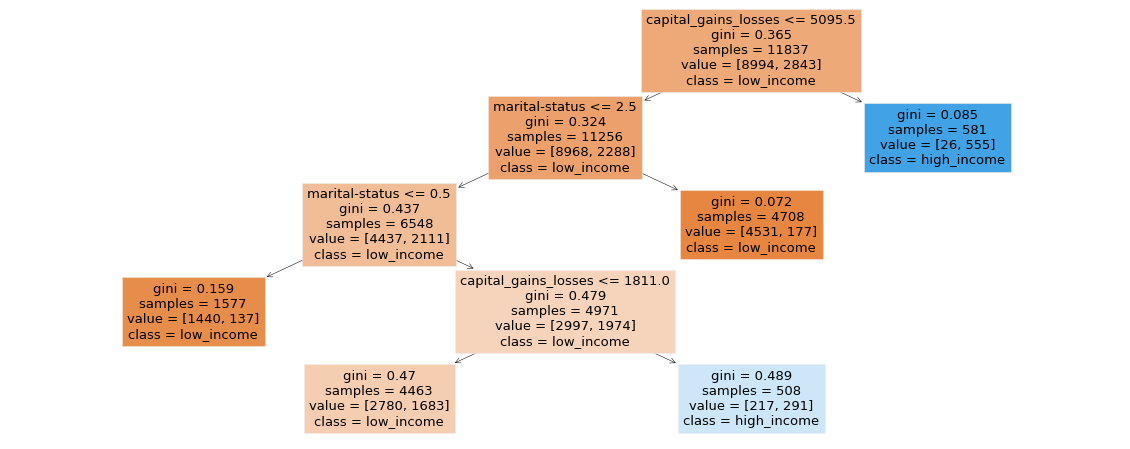

In [20]:
fig = plt.figure(figsize=(20,8))
_=tree.plot_tree(cart_classifier, feature_names=new_adultDF.columns, class_names=['low_income', 'high_income'], filled=True)

# TRAIN A MODEL USING C5.0 CLASSIFIER

In [21]:
c5_classifier = DecisionTreeClassifier(criterion='entropy',
                                         max_leaf_nodes=5,
                                         random_state=120)
c5_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=120)

# VISUALIZING C5 TREE

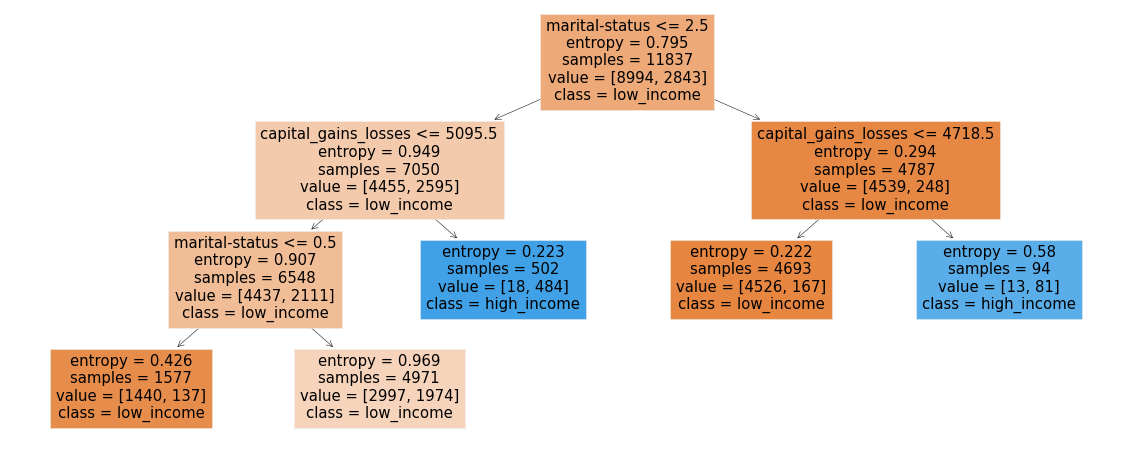

In [22]:
fig = plt.figure(figsize=(20,8))
_=tree.plot_tree(c5_classifier, 
                 feature_names=new_adultDF.columns, 
                 class_names=['low_income', 'high_income'], 
                 filled=True)

# PREDICTION USING CART CLASSIFIER & C5 CLASSIFIER

In [23]:
y_pred_cart = cart_classifier.predict(X_test)
y_pred_c5 = c5_classifier.predict(X_test)

# ACCURACY ON TRAIN AND TEST

In [24]:
print(f'Model Summary'.upper().center(110))
print('='*114)
print(f'1. CART CLASSIFIER:')
print(f'Accuracy on train: {round(cart_classifier.score(X_train, y_train),4)}')
print(f'Accuracy on test : {round(accuracy_score(y_test, y_pred_cart),4)}')
print('-'*25)
print(f'2. C5 CLASSIFIER:')
print(f'Accuracy on train: {round(c5_classifier.score(X_train, y_train),4)}')
print(f'Accuracy on test : {round(accuracy_score(y_test, y_pred_c5),4)}')
print('='*114)

                                                MODEL SUMMARY                                                 
1. CART CLASSIFIER:
Accuracy on train: 0.8108
Accuracy on test : 0.8064
-------------------------
2. C5 CLASSIFIER:
Accuracy on train: 0.8049
Accuracy on test : 0.7983


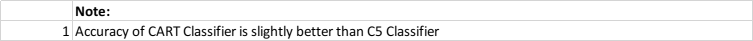

# CONFUSION MATRIX

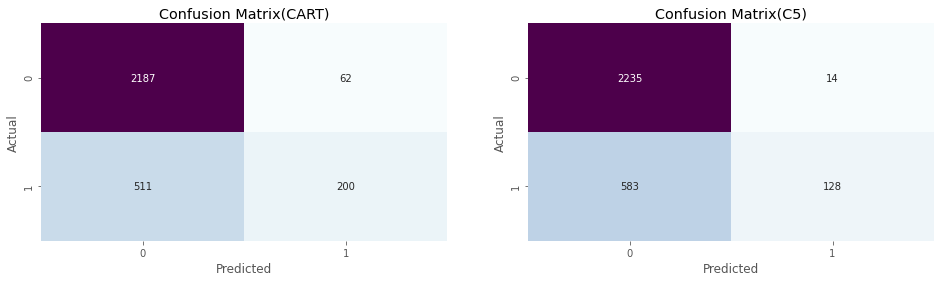

In [25]:
cm_cart = confusion_matrix(y_test, y_pred_cart)
cm_c5 = confusion_matrix(y_test, y_pred_c5)

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.heatmap(cm_cart, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix(CART)');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.subplot(1,2,2)
sns.heatmap(cm_c5, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix(C5)');
plt.xlabel('Predicted');
plt.ylabel('Actual');


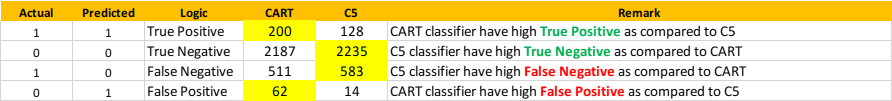

# MODEL COMPARISION

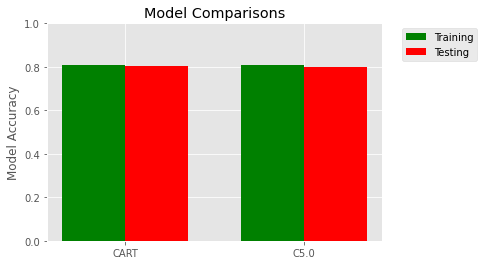

In [33]:
labels = ['CART', 'C5.0']

score1 = cart_classifier.score(X_train, y_train)
score2 = c5_classifier.score(X_train, y_train)
score3 = accuracy_score(y_test, y_pred_cart)
score4 = accuracy_score(y_test, y_pred_c5)

training_scores = [score1, score3]
testing_scores =  [score2, score4]

x = np.arange(2)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='green')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='red')

ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()


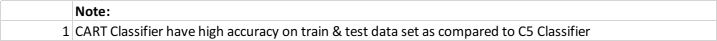

# PARAMETER TUNNING ON CART CLASSIFIER

In [26]:
max_leaf_nodes = [3, 4, 5, 6, 7, 8, 9, 10, 11, None]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, None]

accuracy_cart_train = []
accuracy_cart_test = []
for i,j in zip(max_leaf_nodes, max_depth):
    cart = DecisionTreeClassifier(criterion='gini',
                                 max_leaf_nodes=i,
                                 max_depth=j,
                                 random_state=120)
    cart.fit(X_train, y_train)
    y_pred = cart.predict(X_test)
    train_accuracy = cart.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    accuracy_cart_train.append(train_accuracy)
    accuracy_cart_test.append(test_accuracy)
    print(f'Max Lead Nodes: {str(i):{4}} | Max Depth : {str(j):{4}} | Train Accuracy: {round(train_accuracy,4)} | Test Accuracy : {round(test_accuracy,4)}')

Max Lead Nodes: 3    | Max Depth : 2    | Train Accuracy: 0.8045 | Test Accuracy : 0.7993
Max Lead Nodes: 4    | Max Depth : 3    | Train Accuracy: 0.8045 | Test Accuracy : 0.7993
Max Lead Nodes: 5    | Max Depth : 4    | Train Accuracy: 0.8108 | Test Accuracy : 0.8064
Max Lead Nodes: 6    | Max Depth : 5    | Train Accuracy: 0.8225 | Test Accuracy : 0.8142
Max Lead Nodes: 7    | Max Depth : 6    | Train Accuracy: 0.8225 | Test Accuracy : 0.8142
Max Lead Nodes: 8    | Max Depth : 7    | Train Accuracy: 0.8229 | Test Accuracy : 0.8132
Max Lead Nodes: 9    | Max Depth : 8    | Train Accuracy: 0.8235 | Test Accuracy : 0.8125
Max Lead Nodes: 10   | Max Depth : 9    | Train Accuracy: 0.8235 | Test Accuracy : 0.8125
Max Lead Nodes: 11   | Max Depth : 10   | Train Accuracy: 0.8255 | Test Accuracy : 0.8166
Max Lead Nodes: None | Max Depth : None | Train Accuracy: 0.8338 | Test Accuracy : 0.8267


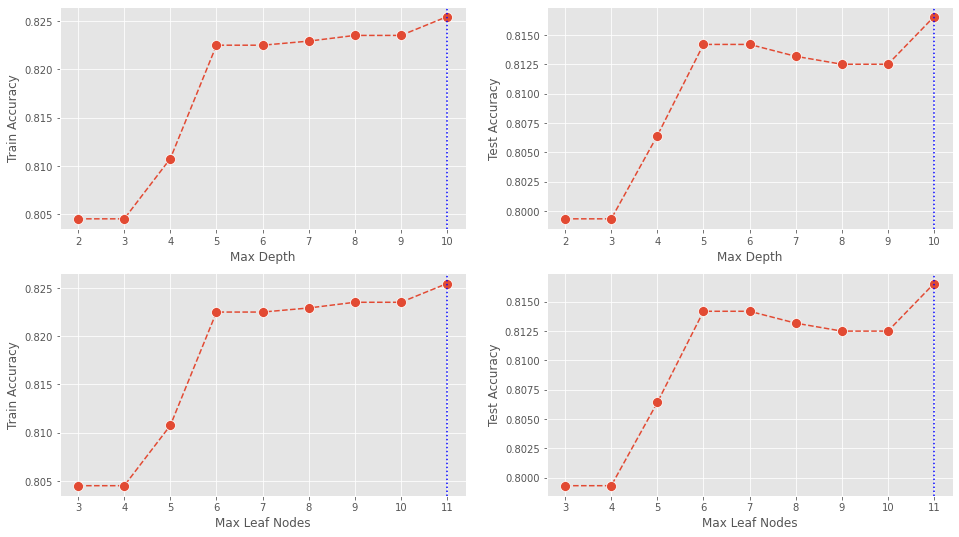

In [27]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
plt.style.use('ggplot')
sns.lineplot(x=max_depth, y=accuracy_cart_train, marker='o', linestyle='--', markersize=10);
plt.xlabel('Max Depth');
plt.ylabel('Train Accuracy');
plt.axvline(10, color='blue', ls=':');

plt.subplot(2,2,2)
plt.style.use('ggplot')
sns.lineplot(x=max_depth, y=accuracy_cart_test, marker='o', linestyle='--', markersize=10);
plt.xlabel('Max Depth');
plt.ylabel('Test Accuracy');
plt.axvline(10, color='blue', ls=':');

plt.subplot(2,2,3)
plt.style.use('ggplot')
sns.lineplot(x=max_leaf_nodes, y=accuracy_cart_train, marker='o', linestyle='--', markersize=10);
plt.xlabel('Max Leaf Nodes');
plt.ylabel('Train Accuracy');
plt.axvline(11, color='blue', ls=':');

plt.subplot(2,2,4)
plt.style.use('ggplot')
sns.lineplot(x=max_leaf_nodes, y=accuracy_cart_test, marker='o', linestyle='--', markersize=10);
plt.xlabel('Max Leaf Nodes');
plt.ylabel('Test Accuracy');
plt.axvline(11, color='blue', ls=':');

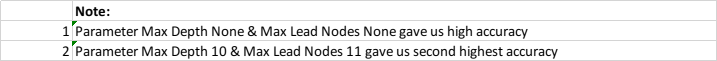

# PARAMETER TUNNING ON C5 CLASSIFIER

In [28]:
max_leaf_nodes = [3, 4, 5, 6, 7, 8, 9, 10, 11, None]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, None]

accuracy_c5_train = []
accuracy_c5_test = []
for i,j in zip(max_leaf_nodes, max_depth):
    c5 = DecisionTreeClassifier(criterion='entropy',
                                 max_leaf_nodes=i,
                                 max_depth=j,
                                 random_state=120)
    c5.fit(X_train, y_train)
    y_pred = c5.predict(X_test)
    train_accuracy = c5.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    accuracy_c5_train.append(train_accuracy)
    accuracy_c5_test.append(test_accuracy)
    print(f'Max Lead Nodes: {str(i):{4}} | Max Depth : {str(j):{6}} | Train Accuracy: {round(train_accuracy,6)} | Test Accuracy : {round(test_accuracy,4)}')

Max Lead Nodes: 3    | Max Depth : 2      | Train Accuracy: 0.799189 | Test Accuracy : 0.7963
Max Lead Nodes: 4    | Max Depth : 3      | Train Accuracy: 0.799189 | Test Accuracy : 0.7963
Max Lead Nodes: 5    | Max Depth : 4      | Train Accuracy: 0.804934 | Test Accuracy : 0.7983
Max Lead Nodes: 6    | Max Depth : 5      | Train Accuracy: 0.811185 | Test Accuracy : 0.8054
Max Lead Nodes: 7    | Max Depth : 6      | Train Accuracy: 0.822928 | Test Accuracy : 0.8132
Max Lead Nodes: 8    | Max Depth : 7      | Train Accuracy: 0.822928 | Test Accuracy : 0.8132
Max Lead Nodes: 9    | Max Depth : 8      | Train Accuracy: 0.822928 | Test Accuracy : 0.8132
Max Lead Nodes: 10   | Max Depth : 9      | Train Accuracy: 0.823688 | Test Accuracy : 0.8139
Max Lead Nodes: 11   | Max Depth : 10     | Train Accuracy: 0.823688 | Test Accuracy : 0.8139
Max Lead Nodes: None | Max Depth : None   | Train Accuracy: 0.833826 | Test Accuracy : 0.8264


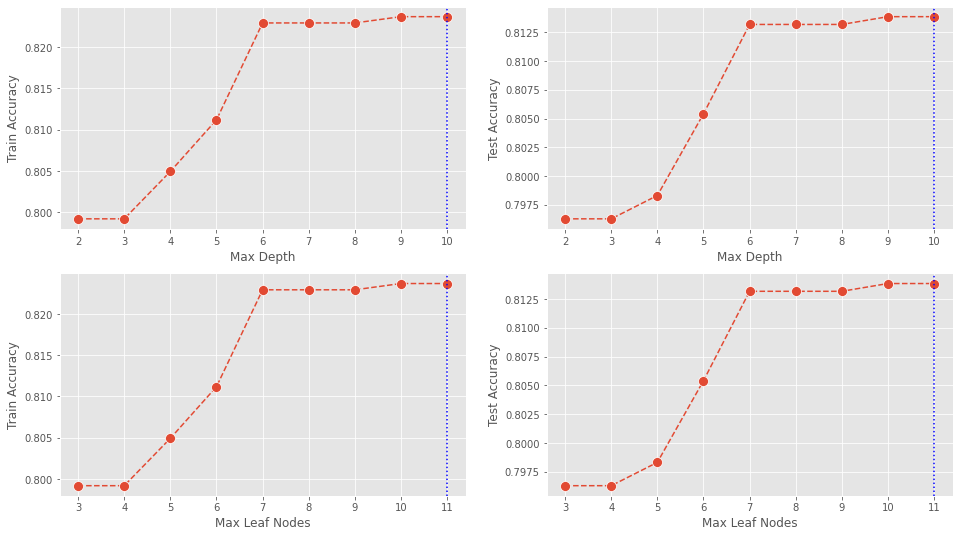

In [46]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
plt.style.use('ggplot')
sns.lineplot(x=max_depth, y=accuracy_c5_train, marker='o', linestyle='--', markersize=10);
plt.xlabel('Max Depth');
plt.ylabel('Train Accuracy');
plt.axvline(10, color='blue', ls=':');

plt.subplot(2,2,2)
plt.style.use('ggplot')
sns.lineplot(x=max_depth, y=accuracy_c5_test, marker='o', linestyle='--', markersize=10);
plt.xlabel('Max Depth');
plt.ylabel('Test Accuracy');
plt.axvline(10, color='blue', ls=':');

plt.subplot(2,2,3)
plt.style.use('ggplot')
sns.lineplot(x=max_leaf_nodes, y=accuracy_c5_train, marker='o', linestyle='--', markersize=10);
plt.xlabel('Max Leaf Nodes');
plt.ylabel('Train Accuracy');
plt.axvline(11, color='blue', ls=':');

plt.subplot(2,2,4)
plt.style.use('ggplot')
sns.lineplot(x=max_leaf_nodes, y=accuracy_c5_test, marker='o', linestyle='--', markersize=10);
plt.xlabel('Max Leaf Nodes');
plt.ylabel('Test Accuracy');
plt.axvline(11, color='blue', ls=':');


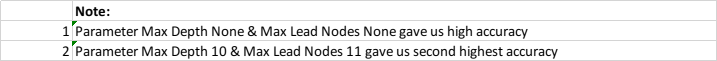

# END